In [1]:

using DifferentialEquations, Plots; pyplot();
using LinearAlgebra 
theme(:ggplot2)


In [2]:
n = 6;
kv = 0.05;

Adj = [0 1 0 0 0 1;
       1 0 1 0 0 1;
       0 1 0 1 0 1;
       0 0 1 0 1 1;
       0 0 0 1 0 1;
       1 1 1 1 1 0];

d = zeros(n,n); 
c1 = cos(2*pi/5);
c2 = cos(pi/5);
s1 = sin(2*pi/5);
s2 = sin(4*pi/5);
x_coor = [0; -s1; -s2; s2; s1; 0];  
y_coor = [1; c1; -c2; -c2; c1; 0];  
z_coor = [0.0; 0.0; 0.0; 0.0; 0.0; 0.0];

In [3]:
for ii = 1:n
    for jj = 1:n
        d[ii,jj] = sqrt((x_coor[ii]-x_coor[jj])^2+(y_coor[ii]-y_coor[jj])^2+(z_coor[ii]-z_coor[jj])^2)
    end
end

In [4]:
ub = 0.5;                           # Upper bound for random ini. condition
lb = -0.5;                          # Lower bound for random ini. condition
tfinal = 10;                        # Simulation ending time assume always
                                    # starts at 0
                           

In [5]:
mutable struct para
n
kv
Adj
d
end

In [6]:
p=para(n,kv,Adj,d)

para(6, 0.05, [0 1 … 0 1; 1 0 … 0 1; … ; 0 0 … 0 1; 1 1 … 1 0], [0.0 1.1755705045849463 … 1.1755705045849463 1.0; 1.1755705045849463 0.0 … 1.902113032590307 0.9999999999999999; … ; 1.1755705045849463 1.902113032590307 … 0.0 0.9999999999999999; 1.0 0.9999999999999999 … 0.9999999999999999 0.0])

In [7]:
q_0 = [0.3147   -0.5377   -0.8093    1.0527    1.4082   -0.3581;
       1.4058    0.4414   -0.7621   -1.1514    0.2944   -0.0782;
            0         0         0         0         0         0];

In [8]:
q_0_vec = reshape(q_0,(1,:));

In [9]:
time_span = (0.0,10.0);

In [10]:
function f(du,u,p,t)
    n = p.n
    kv = p.kv
    Adj = p.Adj
    d = p.d
    u = reshape(u,(3,:))

    z = zeros(2*n-3,1)
    R = zeros(2*n-3,3*n)
    e = zeros(n,n)

    ord = 1
    for i=1:n-1
        for j=i+1:n
            e[i,j] = sqrt((u[:,i]-u[:,j])'*(u[:,i]-u[:,j]))-d[i,j]
            # print("i =",i,"j=",j,"\n")
            if Adj[i,j] == 1
                z[ord] = e[i,j]*(e[i,j]+2*d[i,j]);
                R[ord,3*i-2:3*i] = (u[:,i]-u[:,j])';
                R[ord,3*j-2:3*j] = (u[:,j]-u[:,i])';
                ord = ord+1;
            end
        end
    end
    control =  -kv * R' * z
    control = reshape(control,(1,:))
    du .= control;
end


f (generic function with 1 method)

In [11]:
prob = ODEProblem(f,q_0_vec,time_span,p)

sol = solve(prob,saveat=0.1)

pos = sol.u

101-element Array{Array{Float64,2},1}:
 [0.3147 1.4058 … -0.0782 0.0]
 [0.30842678862813994 1.3927913813211976 … -0.07396898554134113 0.0]
 [0.3029691184556908 1.3808556808014574 … -0.06989686960240833 0.0]
 [0.298187972192451 1.3698443227076347 … -0.06599350183135236 0.0]
 [0.29397463968446186 1.3596368709775513 … -0.0622610071964926 0.0]
 [0.2902439278499775 1.3501354194689228 … -0.058696483611583486 0.0]
 [0.2869278996711181 1.3412592031974386 … -0.05529427568477855 0.0]
 [0.2839704352583543 1.3329397160479293 … -0.05204755913995581 0.0]
 [0.28132519709257536 1.3251188697478264 … -0.04894887653593608 0.0]
 [0.27895416438603665 1.3177475523368491 … -0.0459903776506315 0.0]
 [0.2768254345385491 1.310783526502298 … -0.043164323069599 0.0]
 [0.2749117208779738 1.304189886489155 … -0.04046323671931769 0.0]
 [0.27318923570603754 1.297933919486112 … -0.03788001424643709 0.0]
 ⋮
 [0.2690329264362398 1.1251755227342017 … 0.029343561065221856 0.0]
 [0.2692192825138863 1.1242442992409636 … 0.0

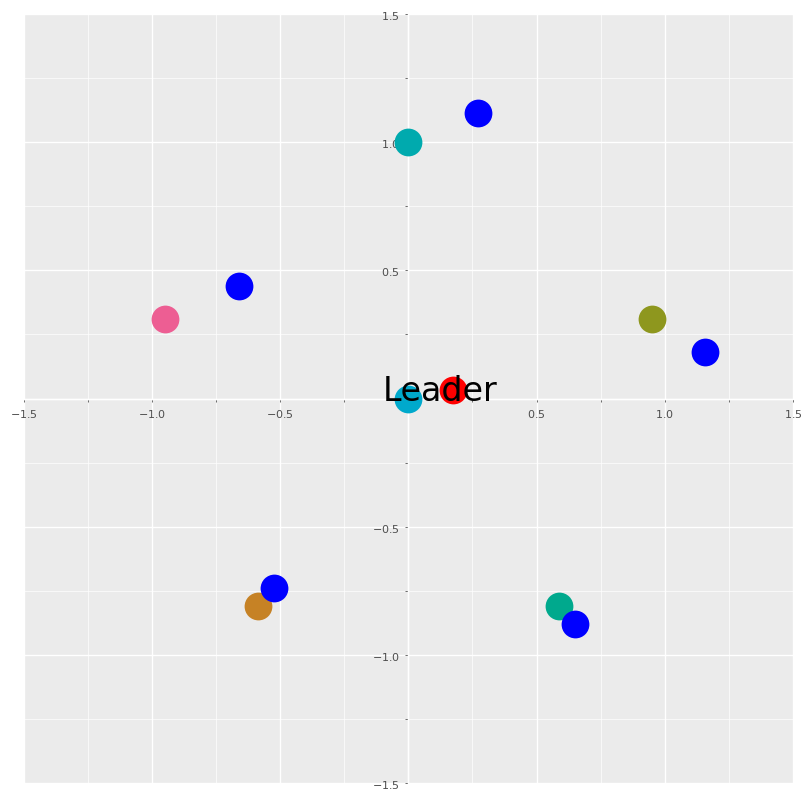

Animation("/tmp/jl_tUEQdb", ["000001.png", "000002.png", "000003.png", "000004.png", "000005.png", "000006.png", "000007.png", "000008.png", "000009.png", "000010.png"  …  "000092.png", "000093.png", "000094.png", "000095.png", "000096.png", "000097.png", "000098.png", "000099.png", "000100.png", "000101.png"])

In [13]:
anim = @animate for i in 1:length(pos)    
    plt = scatter(5,xlim=(-1.5,1.5),ylim=(-1.5,1.5), c=:red, aspect_ratio = 1,legend=false, framestyle=:origin)
    pst = pst=reshape(pos[i],(3,6))
    scatter!(x_coor',y_coor', markersize=20,aspect_ratio = 1 )
    scatter!(plt,pst[1,1:5],pst[2,1:5] ,markersize=20,c=:blue, legend=false)
    scatter!(plt,[pst[1,6]],[pst[2,6]] ,markersize=20,c=:red,legend=false)
    annotate!([(pst[1,6]-0.05, pst[2,6], text("Leader",24))])
    scatter!(size=(800,800))
end

┌ Info: Saved animation to 
│   fn = /home/bbm/Documents/research/FormationControl/tmp.gif
└ @ Plots /home/bbm/.julia/packages/Plots/LWw1t/src/animation.jl:104


Plots.AnimatedGif("/home/bbm/Documents/research/FormationControl/tmp.gif")
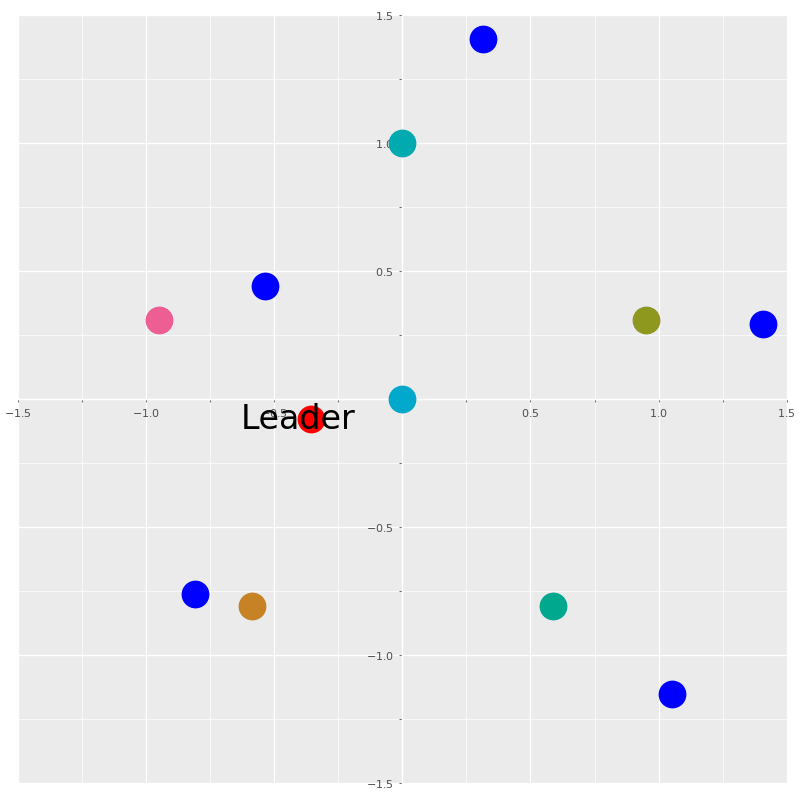

In [14]:
gif(anim,fps=10)

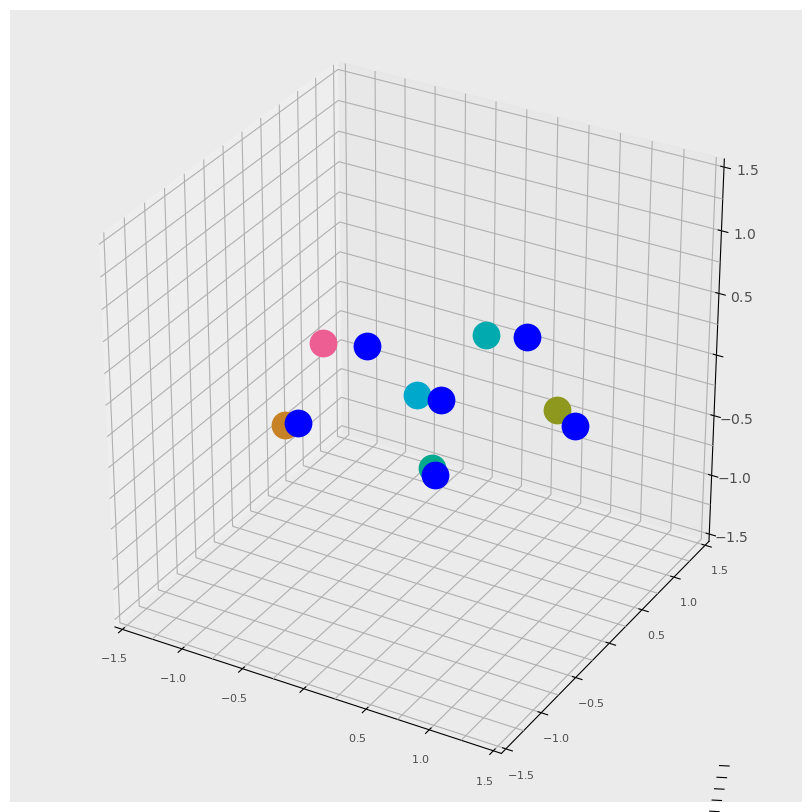

Animation("/tmp/jl_sEspuA", ["000001.png", "000002.png", "000003.png", "000004.png", "000005.png", "000006.png", "000007.png", "000008.png", "000009.png", "000010.png"  …  "000092.png", "000093.png", "000094.png", "000095.png", "000096.png", "000097.png", "000098.png", "000099.png", "000100.png", "000101.png"])

In [15]:
anim = @animate for i in 1:length(pos)    
    plt = scatter(5,xlim=(-1.5,1.5),ylim=(-1.5,1.5), zlim=(-1.5,1.5),c=:red,legend=false, framestyle=:origin)
    pst = pst=reshape(pos[i],(3,6))
    scatter!(x_coor',y_coor', z_coor', markersize=20 )
    scatter!(plt,pst[1,:],pst[2,:] , pst[3,:],markersize=20,c=:blue, legend=false)
    scatter!(size=(800,800))
end

┌ Info: Saved animation to 
│   fn = /home/bbm/Documents/research/FormationControl/tmp.gif
└ @ Plots /home/bbm/.julia/packages/Plots/LWw1t/src/animation.jl:104


Plots.AnimatedGif("/home/bbm/Documents/research/FormationControl/tmp.gif")
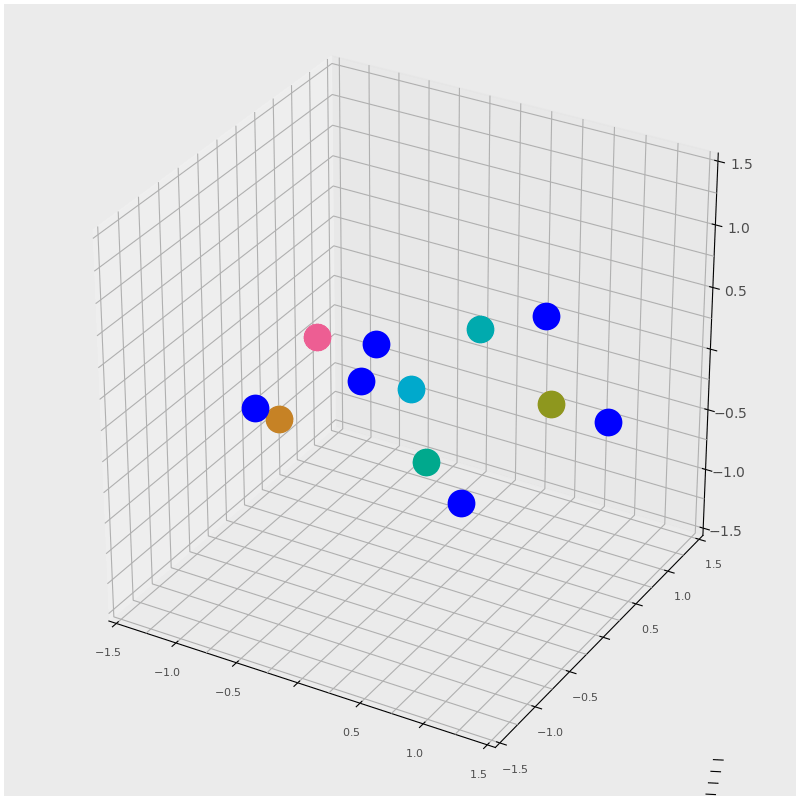

In [16]:
gif(anim,fps=10)

## Formation Acquistion

In [34]:
function Desired_velocity(t,q)
    ω = [0,0,0];
    vt = [1;cos(t);0] # it is cost along y axis
    n = 6
    vr = zeros(n,3);
    # print(size(q))
    q = q';
    buff = reshape(q[n,:],(1,3))
    zqwe = kron(ones(6,1),buff);
    qr = q - zqwe;
    
    for i = 1:n
        vr[i,:] = cross(ω,qr[i,:]);
    end
    return kron(ones(n,1),vt)+reshape(vr',(:,1))
end

Desired_velocity (generic function with 1 method)

In [35]:
function form_with_vel(du,u,p,t)
    n = p.n
    kv = p.kv
    Adj = p.Adj
    d = p.d
    u = reshape(u,(3,:))

    z = zeros(2*n-3,1)
    R = zeros(2*n-3,3*n)
    e = zeros(n,n)

    ord = 1
    for i=1:n-1
        for j=i+1:n
            e[i,j] = sqrt((u[:,i]-u[:,j])'*(u[:,i]-u[:,j]))-d[i,j]
            # print("i =",i,"j=",j,"\n")
            if Adj[i,j] == 1
                z[ord] = e[i,j]*(e[i,j]+2*d[i,j]);
                R[ord,3*i-2:3*i] = (u[:,i]-u[:,j])';
                R[ord,3*j-2:3*j] = (u[:,j]-u[:,i])';
                ord = ord+1;
            end
        end
    end
    vd = Desired_velocity(t,u);
    control =  -kv * R' * z + vd
    control = reshape(control,(1,:))
    du .= control;
end

form_with_vel (generic function with 1 method)

In [36]:
prob2= ODEProblem(form_with_vel,q_0_vec,time_span,p)

sol2 = solve(prob2,saveat=0.1)

pos2 = sol2.u

101-element Array{Array{Float64,2},1}:
 [0.3147 1.4058 … -0.0782 0.0]
 [0.40842676369099373 1.4926247989928205 … 0.02586444038583926 0.0]
 [0.5029692447444211 1.5795251256352254 … 0.12877252408948683 0.0]
 [0.5981879037211814 1.665364448727838 … 0.2295266672773722 0.0]
 [0.6939744160616 1.7490555400527035 … 0.32715776976002997 0.0]
 [0.7902440728518866 1.8295613089447627 … 0.4207292841424509 0.0]
 [0.8869281164470416 1.9059014580612492 … 0.5093478629411687 0.0]
 [0.9839702909899435 1.9771572608957668 … 0.5921701139793907 0.0]
 [1.081324902359317 2.042476476976626 … 0.6684089633061507 0.0]
 [1.1789541189200916 2.1010763028432615 … 0.7373383673226963 0.0]
 [1.276825760052494 2.152254618158644 … 0.7983064579627911 0.0]
 [1.3749119572962876 2.1953962117121404 … 0.8507429207203027 0.0]
 [1.4731891543507658 2.229972781419517 … 0.894158994649199 0.0]
 ⋮
 [9.169032683415683 1.6256318256986626 … 0.5298001787865444 0.0]
 [9.269219047100307 1.5358889530469484 … 0.4412174499458215 0.0]
 [9.3694035

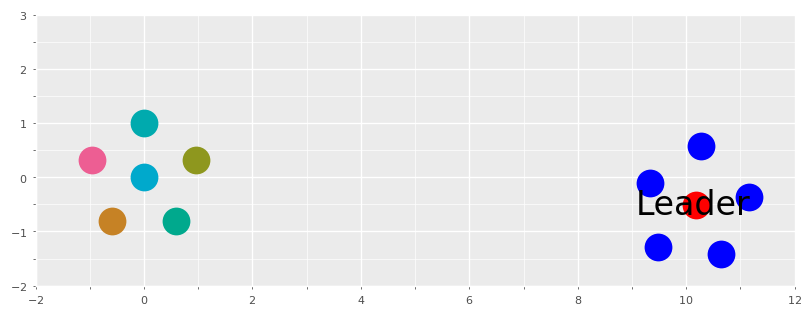

Animation("/tmp/jl_Bd8lOZ", ["000001.png", "000002.png", "000003.png", "000004.png", "000005.png", "000006.png", "000007.png", "000008.png", "000009.png", "000010.png"  …  "000092.png", "000093.png", "000094.png", "000095.png", "000096.png", "000097.png", "000098.png", "000099.png", "000100.png", "000101.png"])

In [37]:
anim2 = @animate for i in 1:length(pos2)    
    plt = scatter(5,xlim=(-2,12),ylim=(-2,3), c=:red, aspect_ratio = 1,legend=false)
    pst = pst=reshape(pos2[i],(3,6))
    scatter!(x_coor',y_coor', markersize=20,aspect_ratio = 1 )
    scatter!(plt,pst[1,1:5],pst[2,1:5] ,markersize=20,c=:blue, legend=false)
    scatter!(plt,[pst[1,6]],[pst[2,6]] ,markersize=20,c=:red,legend=false)
    annotate!([(pst[1,6]-0.05, pst[2,6], text("Leader",24))])
    scatter!(xlabel = "x" ,ylabel = "y")
    scatter!(size=(800,800))
end

┌ Info: Saved animation to 
│   fn = /home/bbm/Documents/research/FormationControl/tmp.gif
└ @ Plots /home/bbm/.julia/packages/Plots/LWw1t/src/animation.jl:104


Plots.AnimatedGif("/home/bbm/Documents/research/FormationControl/tmp.gif")
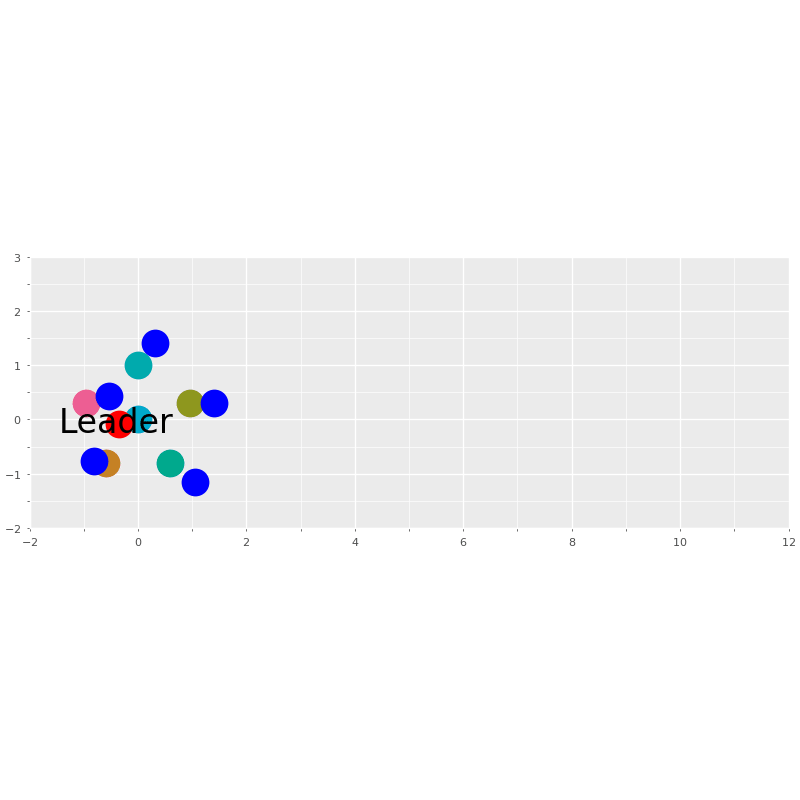

In [38]:
gif(anim2,fps=10)

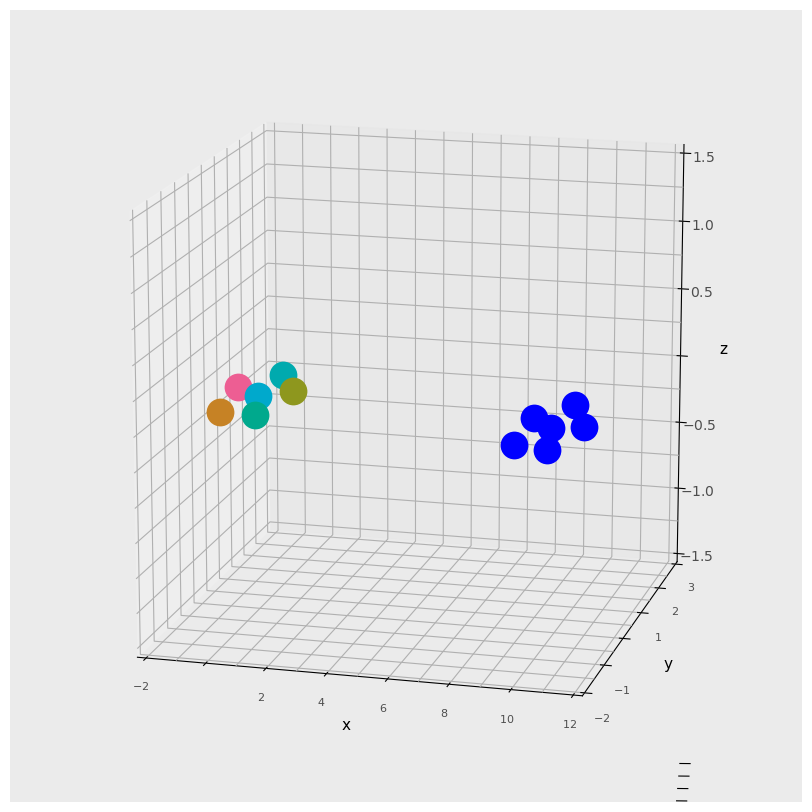

Animation("/tmp/jl_Q2KXRA", ["000001.png", "000002.png", "000003.png", "000004.png", "000005.png", "000006.png", "000007.png", "000008.png", "000009.png", "000010.png"  …  "000092.png", "000093.png", "000094.png", "000095.png", "000096.png", "000097.png", "000098.png", "000099.png", "000100.png", "000101.png"])

In [90]:
anim3 = @animate for i in 1:length(pos2)    
    plt = scatter(5,xlim=(-2,12),ylim=(-2,3), zlim=(-1.5,1.5),c=:red,legend=false, framestyle=:origin)
    pst = pst=reshape(pos2[i],(3,6))
    scatter!(x_coor',y_coor', z_coor', markersize=20 )
    scatter!(plt,pst[1,:],pst[2,:] , pst[3,:],markersize=20,c=:blue, legend=false)
    scatter!(size=(800,800))
    scatter!(xlabel = "x" ,ylabel = "y" ,zlabel="z")
    scatter!(camera=(15,15))
end


┌ Info: Saved animation to 
│   fn = /home/bbm/Documents/research/FormationControl/tmp.gif
└ @ Plots /home/bbm/.julia/packages/Plots/LWw1t/src/animation.jl:104


Plots.AnimatedGif("/home/bbm/Documents/research/FormationControl/tmp.gif")
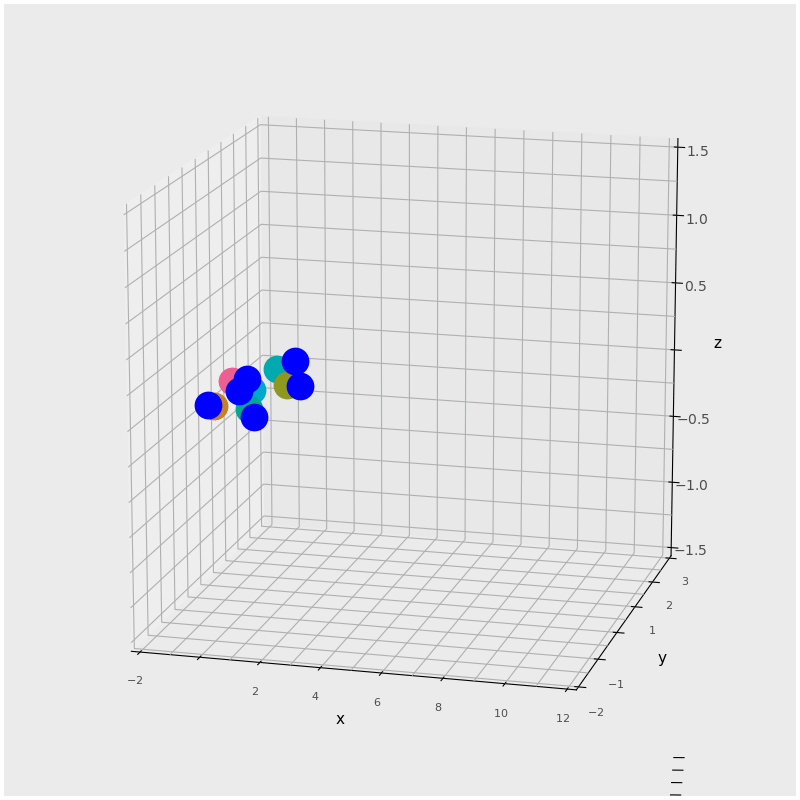

In [91]:
gif(anim3,fps=10)

## Double Integrator Model

$$\dot{q} = u$$ 
$$ \dot{v}_i = u_i \text{  } i=1,\dots,n$$

where $q_i$ is postion and $v_i$ is velocity. 

 $$\dot{e}_{ij} = \frac{\tilde{q}_{ij}^\top(v_i-v_j)}{e_{ij}+d_{ij}}$$

$$\dot{W} = \frac{1}{2} z^\top \dot{z} = z^\top R(\tilde{q})v$$ 

Using backstepping tecqnique to change the Lyapunov function. Let
$$s=v-v_f$$

where $v_f$ is fictitious (or desired) velocity input, which will
be specified later. The variable s quantifies the error between the actual agent velocity and the desired velocity-level input.

$$W_d(e,s) = W(e) + \frac{1}{2}s^\top s$$ 

is the augmented Lyapunov function candidate

$$\dot{W} = z^\top R(\tilde{q})v + s^\top \dot{s}$$ 
$$ = z^\top R(\tilde{q})(s+v_f) + s^\top (u-\dot{v_f})$$
$$ = z^\top R(\tilde{q})v_f + s^\top (u-\dot{v_f})$$